In [61]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Task 1

**Include a basic description of the data (what are the features and labels).**
- The dataset contains 4 features- sepal length, sepal width, petal length, and petal width, all of which are float types. The label is of int type which is assigned as 0 for 'setosa', 1 for 'versicolor', or 2 for 'virginica'. 

**Write in your own words of what the classification task is and why a decision tree is a reasonable model to try for this data.**
- The classification task is to determine which label to catergorize the flower by given its features. A decision tree is a reasonable model because it can split the feature space using simple threshold-based rules.


In [11]:
# Load the iris_dataset
iris_dataset = load_iris()

In [23]:
# Use the data to create a pandas DataFrame for a better visual
iris_df = pd.DataFrame(data=iris_dataset.data, 
                       columns=iris_dataset.feature_names)

# Add the target column to the DataFrame
iris_df['target'] = iris_dataset.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [72]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Task 2

Split the data into training, validation, and testing sets.

In [28]:
# Extract the features and target
features = iris_dataset.data
target = iris_dataset.target

In [35]:
# Split the data into training. validation and testing
x_train, x_temp, y_train, y_temp = train_test_split(features, target,
                                                   test_size=.4,
                                                   random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp,
                                                             test_size=.5,
                                                             random_state=42)

## Task 3

Fit a decision tree on the training dataset.

In [36]:
# Instaniate the Decision Tree Classifier object
decision_tree_classifier = tree.DecisionTreeClassifier()

In [37]:
# Fit the Decision Tree Classifier
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Task 4

Tune at least 2 hyperparameters in the decision tree model (https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e) based on the performance on the validation set or using cross-validation. One hyperparameter has to be max_depth and the other one is your choice.  
Generate plot of hyperparameter values vs performance metric (plots are mandatory).


In [39]:
# Test the max_depth hyperparameter for 10 levels
depths = [] # store for plotting
accuracies = [] # store for plotting
for i in range(1,11):
    decision_tree_classifier = tree.DecisionTreeClassifier(max_depth=i, random_state=42)
    decision_tree_classifier.fit(x_train,y_train)
    # Predict on the validation set
    y_pred = decision_tree_classifier.predict(x_validation)
    
    # Compute the subset accuracy
    accuracy = accuracy_score(y_validation, y_pred)
    
    # Add the depths and accuracy score to their lists
    depths.append(i)
    accuracies.append(accuracy)

Text(0, 0.5, 'Accuracy Score')

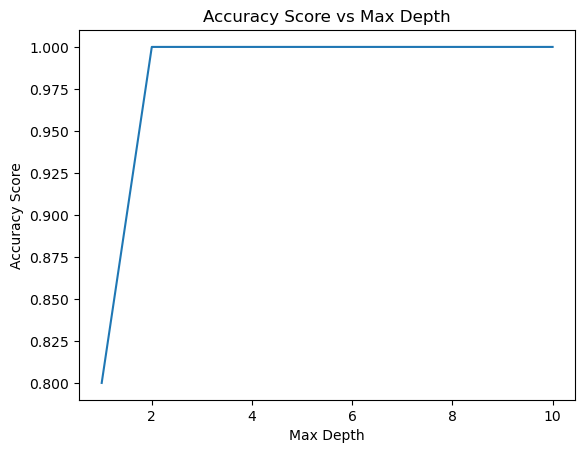

In [41]:
# Plot the accuracy_score vs max_depth
plt.plot(depths, accuracies)
plt.title("Accuracy Score vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")


In [51]:
# Test the min_samples_split 

min_sample_split = []
split_accuracies = []

for i in range(2,12):
    decision_tree_classifier = tree.DecisionTreeClassifier(min_samples_split=i, random_state=42)
    decision_tree_classifier.fit(x_train, y_train)
    y_pred = decision_tree_classifier.predict(x_validation)
    min_accuracy = accuracy_score(y_validation, y_pred)
    min_sample_split.append(i)
    split_accuracies.append(min_accuracy)
    
    

Text(0, 0.5, 'Accuracy Score')

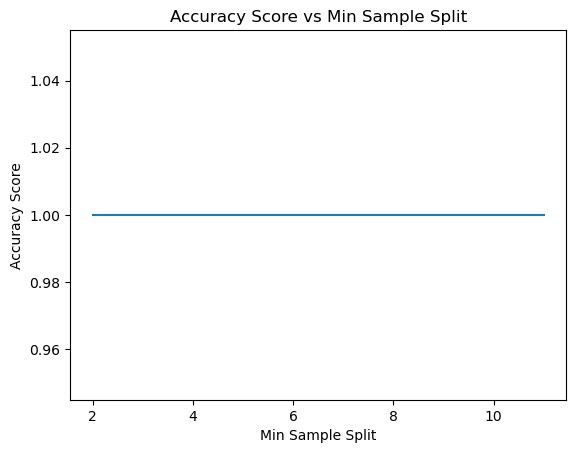

In [52]:
plt.plot(min_sample_split, split_accuracies)
plt.title("Accuracy Score vs Min Sample Split")
plt.xlabel("Min Sample Split")
plt.ylabel("Accuracy Score")

## Task 5

Train the model using optimal hyperparameters (found in step 5) on the train + validation data. Test it on test data and generate a classification report.

In [56]:
# Optimal Hyperparameters
optimal_max_depth = 3
optimal_min_splits = 2

# Training + validation data
x_train = np.concatenate((x_train, x_validation))
y_train = np.concatenate((y_train, y_validation))

In [60]:
testing_model = tree.DecisionTreeClassifier(max_depth=optimal_max_depth, 
                                            min_samples_split=optimal_min_splits,
                                           random_state=42)

testing_model.fit(x_train, y_train)
testing_y_pred = testing_model.predict(x_test)

print(classification_report(y_test, testing_y_pred, 
                      target_names=iris_dataset.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Task 6

Inspect the model by visualizing and interpreting the results.
     

Text(0.5, 1.0, 'Decision Tree Visualization')

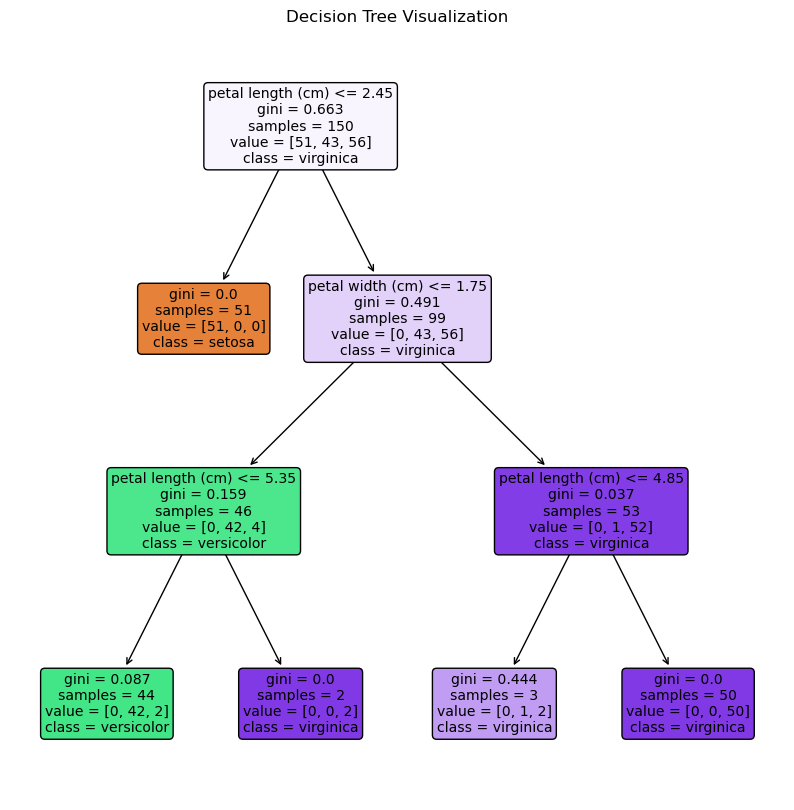

In [65]:
# Visualize the tree
plt.figure(figsize=(10,10))
plot_tree(testing_model, feature_names=iris_dataset.feature_names, 
          class_names=list(iris_dataset.target_names), filled=True, rounded=True)
plt.title("Decision Tree Visualization")

In [79]:
# DataFrame Visualization that shows the given target names vs the predicted
test_df = pd.DataFrame(x_test, columns=iris_dataset.feature_names)
test_df['Actual Labels'] = [iris_dataset.target_names[i] for i in y_test]
test_df['Predicted Labels'] = [iris_dataset.target_names[i] for i in testing_y_pred]
test_df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual Labels,Predicted Labels
0,6.1,2.8,4.7,1.2,versicolor,versicolor
1,5.4,3.4,1.5,0.4,setosa,setosa
2,6.4,3.2,4.5,1.5,versicolor,versicolor
3,5.5,2.4,3.7,1.0,versicolor,versicolor
4,4.9,3.1,1.5,0.1,setosa,setosa
5,7.7,2.8,6.7,2.0,virginica,virginica
6,4.8,3.4,1.6,0.2,setosa,setosa
7,6.6,3.0,4.4,1.4,versicolor,versicolor
8,5.5,3.5,1.3,0.2,setosa,setosa
9,5.0,3.5,1.3,0.3,setosa,setosa


## Conclusion

The Decision Tree Classifier used a `min_samples_split` of 2 and a `max_depth` of 3. The visualization shows that the `setosa` was a perfectly classified, with 51 samples correctly separated using the `petal_length` feature. `virginica` and `versicolor` were slightly harder to distinguish, but at depth 3 the classifier was able to separate them using the `petal width` and `petal_length` features.